# imports

In [1]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
import sys  
import matplotlib.pyplot as plt
sys.path.insert(0, '../')

from src.data.dataset_tracking import read_data, prepare_data, preprocess_data, generate_dataset
from src.visualization.visualize_tracking import plot_arrays
from src.models.constants_tracking import VAL_SPLIT, BATCH_SIZE, EPOCHS, INITIAL_LR, NUM_SAMPLE_POINTS
from src.models.point_net import get_shape_segmentation_model

2023-11-10 20:58:45.900677: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-10 20:58:45.900717: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-10 20:58:45.900750: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-10 20:58:45.907607: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# load model

In [2]:
checkpoint_filepath = './tmp_results_128points/checkpoint'
segmentation_model = get_shape_segmentation_model(NUM_SAMPLE_POINTS, 3)
segmentation_model.load_weights(checkpoint_filepath)

2023-11-10 20:58:47.462306: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-10 20:58:47.466943: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-10 20:58:47.467142: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

# load and prepare data

In [3]:
data_file_path = '../data/raw/wire_tracking/real_test.npy'
full_data = read_data(data_file_path)

point_cloud = full_data.reshape(-1, NUM_SAMPLE_POINTS, 3)
pc_shape = point_cloud.shape
point_cloud = point_cloud - point_cloud.mean(axis=1).reshape(pc_shape[0], 1, pc_shape[2])
point_cloud /= point_cloud.std(axis=1).reshape(pc_shape[0], 1, pc_shape[2])

######################
# shuffle_idx = np.arange(point_cloud.shape[1])
# np.random.shuffle(shuffle_idx)
# point_cloud = point_cloud[:,shuffle_idx,:]

print(full_data.shape)
point_cloud.shape

(77312, 3)


(604, 128, 3)

In [4]:
val_predictions = segmentation_model.predict(point_cloud)
print(f"Validation prediction shape: {val_predictions.shape}")

predict_labels = np.argmax(val_predictions, axis = -1)

 1/19 [>.............................] - ETA: 8s

2023-11-10 20:58:48.353273: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-10 20:58:48.509452: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700


19/19 [==============================] - 1s 3ms/step
Validation prediction shape: (604, 128, 3)


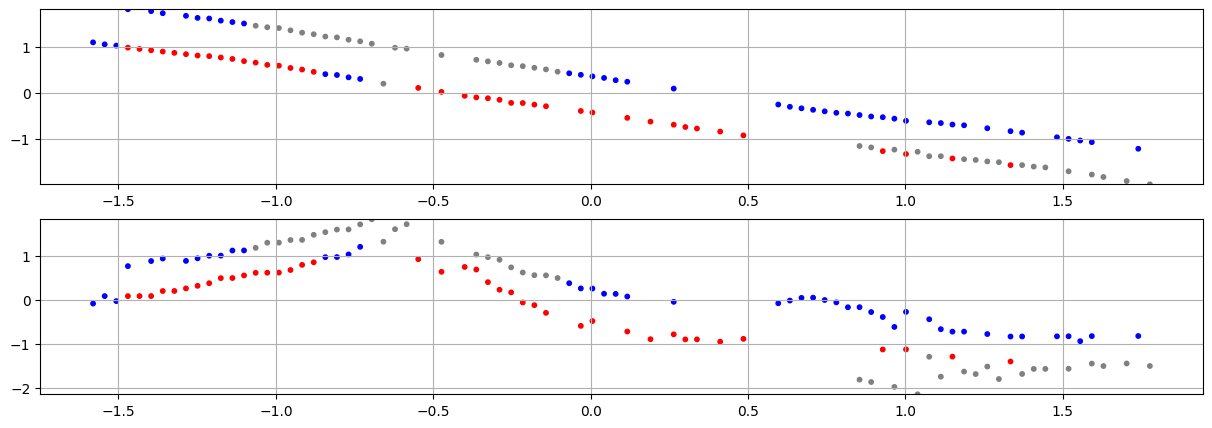

In [5]:
index = 7
plot_arrays(point_cloud[index,:,0], point_cloud[index,:,1], point_cloud[index,:,2], predict_labels[index].astype('int'), figsize=(15,5))

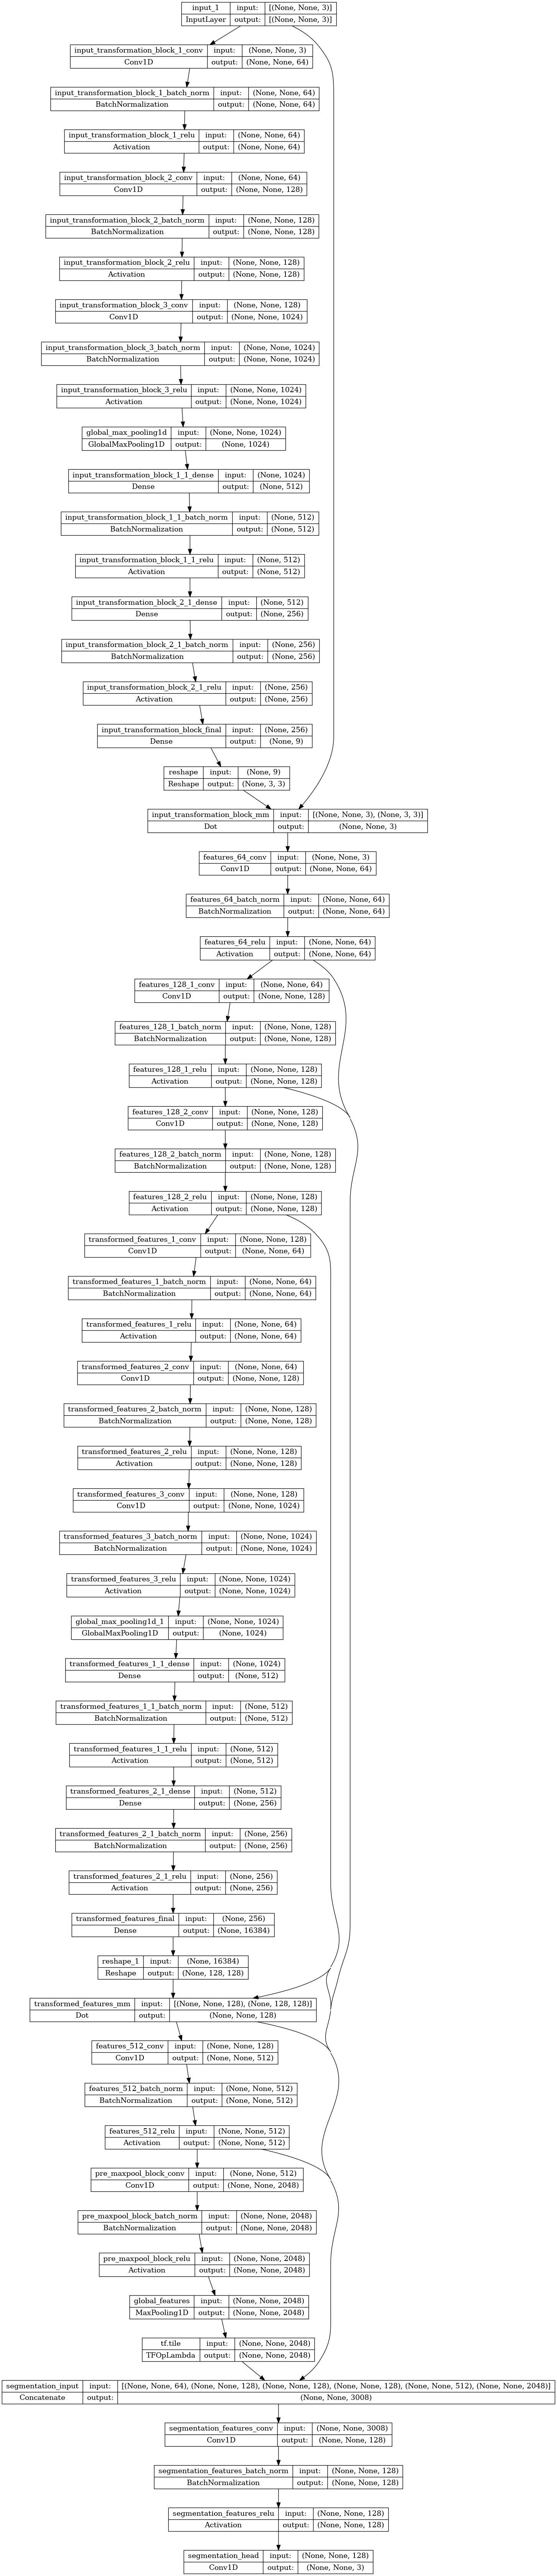

In [8]:
keras.utils.plot_model(segmentation_model, show_shapes=True)

In [7]:
full_data.shape

(77312, 3)